In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB
None
       Unnamed: 0    work_year        salary  salary_in_usd  remote_ratio
count  607.000000   607.000000  6.070000e+02     607.000000     607.00000
mean   303.000000  

In [6]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [7]:
df['experience_level'] = df['experience_level'].replace({
    'EN': 'Entry-Level',
    'MI': 'Mid-Level',
    'SE': 'Senior-Level',
    'EX': 'Executive-Level'
})
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-Level,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,Senior-Level,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,Senior-Level,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,Mid-Level,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,Senior-Level,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


<Axes: xlabel='salary_in_usd', ylabel='Count'>

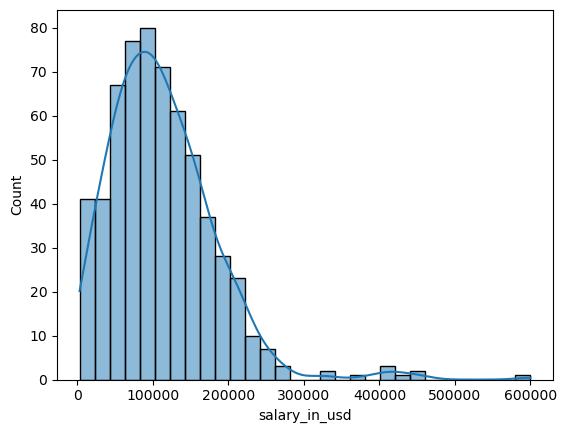

In [10]:
sns.histplot(df['salary_in_usd'], bins=30, kde=True)

/var/folders/8n/jhbvq54x0jq35s2l1pyvd7nm0000gn/T/ipykernel_47189/2658819855.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='experience_level', y='salary_in_usd', data=df, palette='crest')


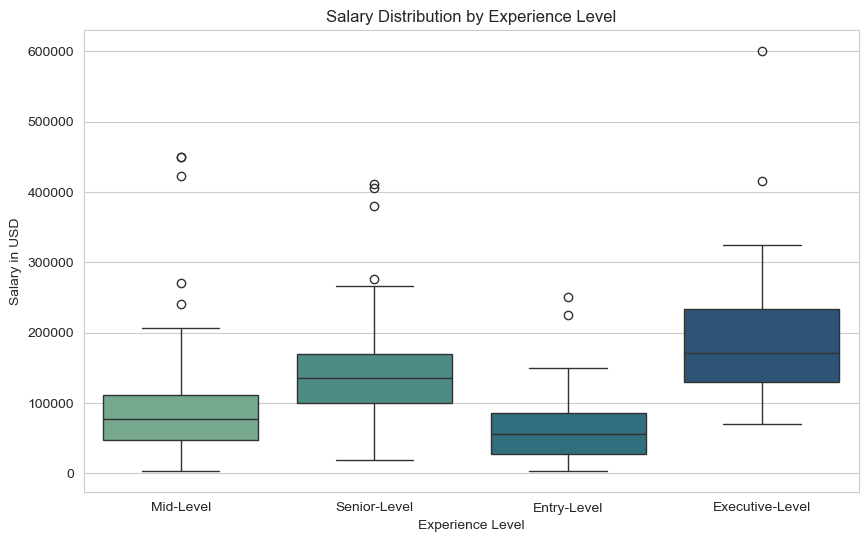

In [14]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, palette='crest')
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()

<Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>

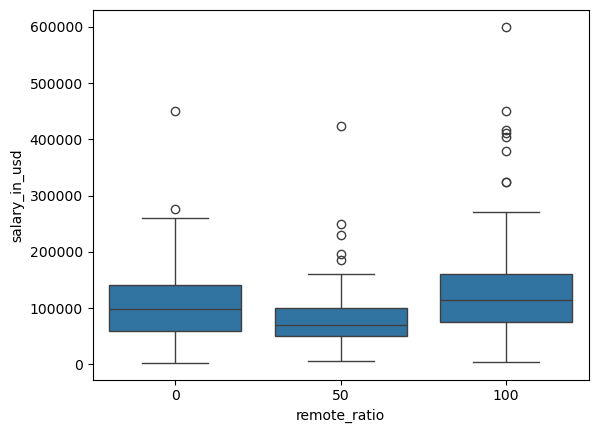

In [12]:
sns.boxplot(x='remote_ratio', y='salary_in_usd', data=df)

In [13]:
df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)

job_title
Data Analytics Lead         405000.000000
Principal Data Engineer     328333.333333
Financial Data Analyst      275000.000000
Principal Data Scientist    215242.428571
Director of Data Science    195074.000000
Data Architect              177873.909091
Applied Data Scientist      175655.000000
Analytics Engineer          175000.000000
Data Specialist             165000.000000
Head of Data                160162.600000
Name: salary_in_usd, dtype: float64

Remote roles seem to offer higher salaries on average.
